In [ ]:
import pandas as pd
d=pd.read_csv('/content/drive/MyDrive/solar_Power_Generation.csv')
d.columns


Index(['Date', 'East_Campus', 'MBA_&_MCA', 'Civil', 'Mech', 'Auto', 'Total'], dtype='object')

In [ ]:
date=d['Date']
total=d['Total']
df=pd.DataFrame({"Date":date,"Total_consumption":total})
df

,Date,Total_consumption
0,19.10.2023,2951
1,20.10.2023,2429
2,21.10.2023,2461
3,22.10.2023,2774
4,23.10.2023,2116
...,...,...
186,22.04.2024,2635
187,23.04.2024,2482
188,24.04.2024,2275
189,25.04.2024,2541


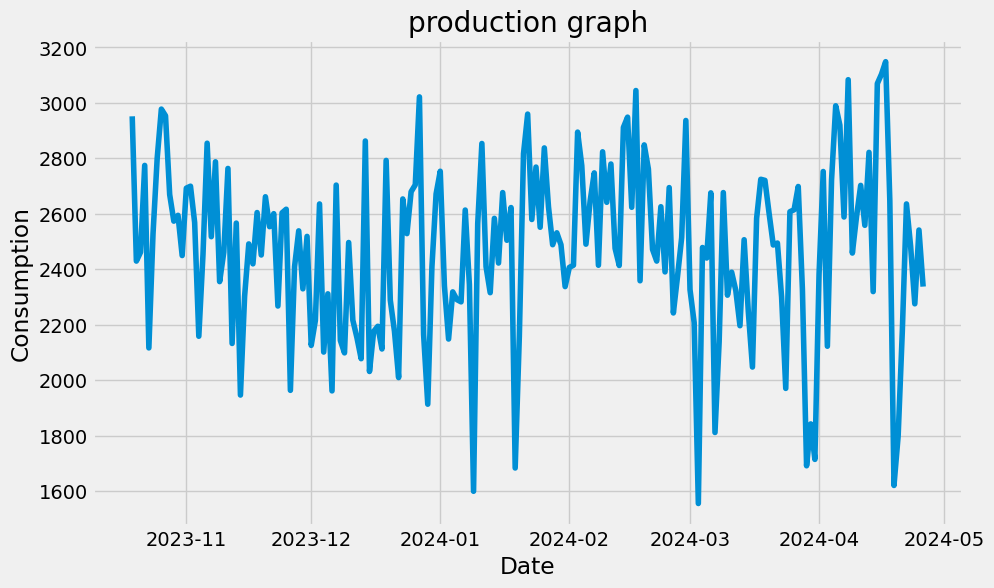

In [ ]:

#The program forecast the consumption of electricity in coming future
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6


df.columns=['Date', 'Consumption']
df=df.dropna()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) #set date as index
df.head()

#Visualize the Value
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.title("production graph")
plt.plot(df)


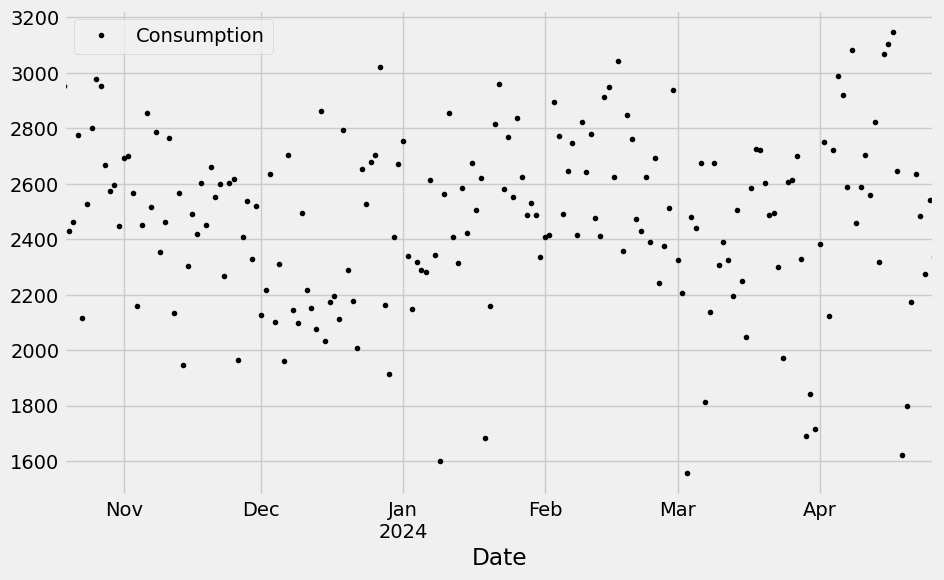

In [ ]:
df.plot(style='k.')
plt.show()

<Axes: ylabel='Density'>

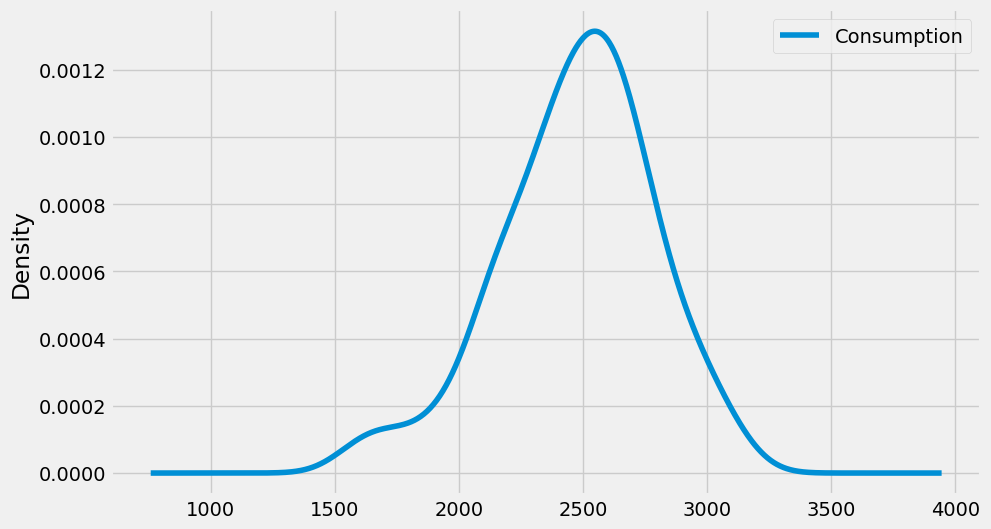

In [ ]:
df.plot(kind='kde')

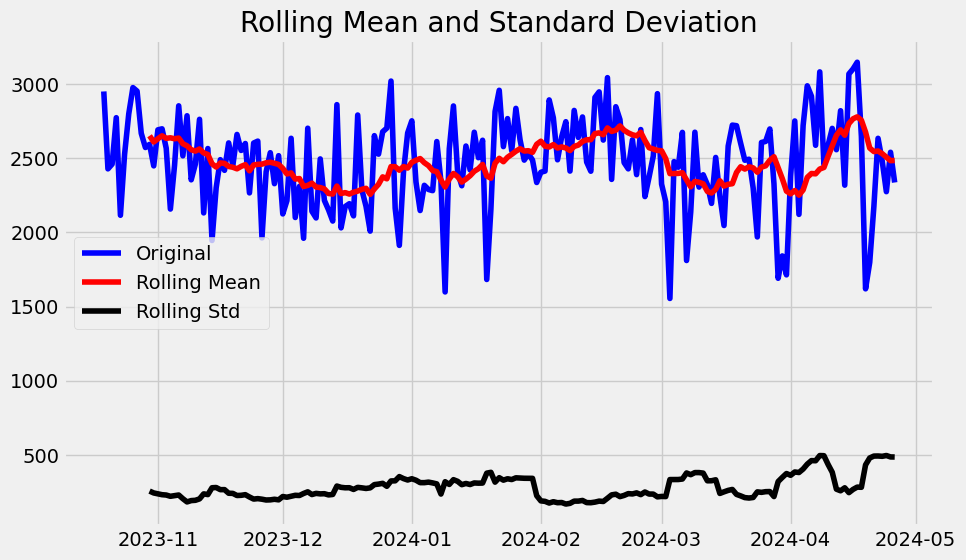

Results of dickey fuller test
Test Statistics               -1.046978e+01
p-value                        1.293343e-18
No. of lags used               0.000000e+00
Number of observations used    1.900000e+02
critical value (1%)           -3.465244e+00
critical value (5%)           -2.876875e+00
critical value (10%)          -2.574945e+00
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    #perform dickey fuller test
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['Consumption'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df)

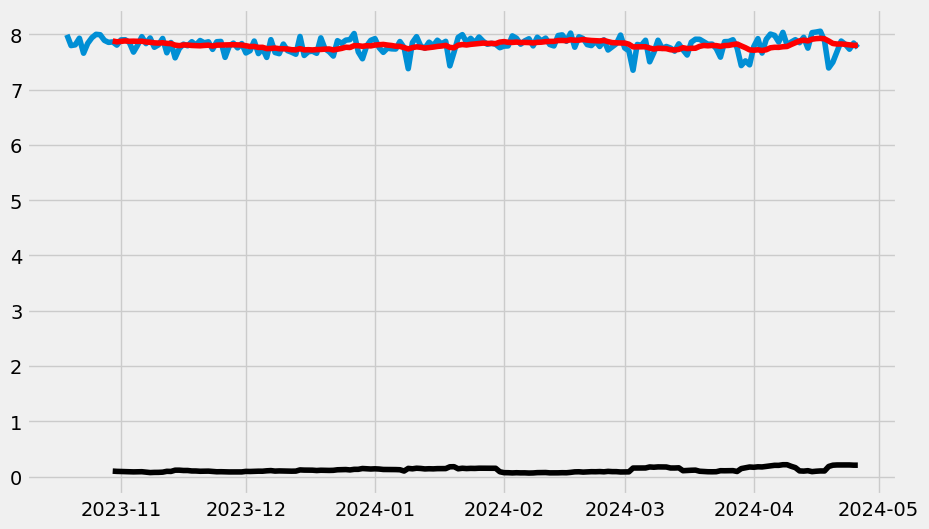

In [ ]:
df_log = np.log(df)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.plot(df_log)
plt.plot(moving_avg, color="red")
plt.plot(std_dev, color ="black")
plt.show()


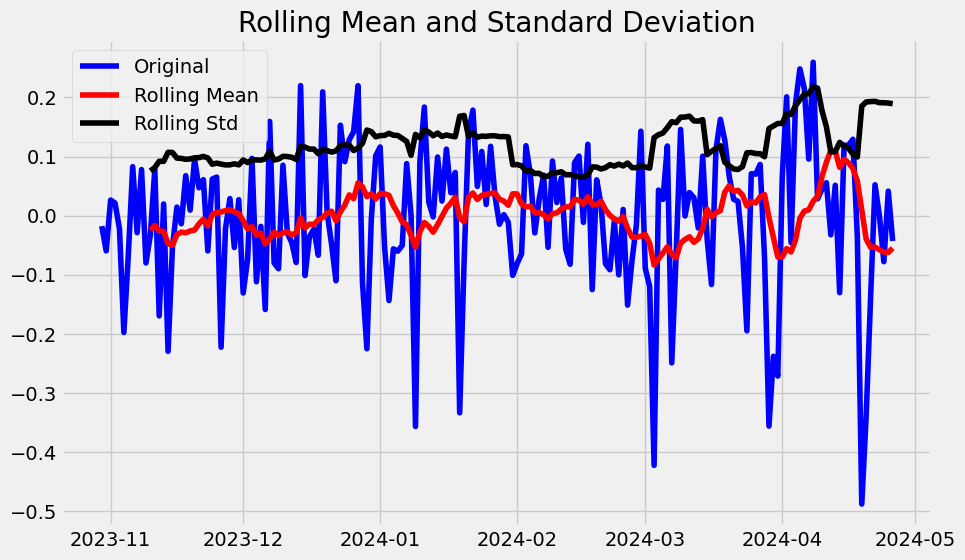

Results of dickey fuller test
Test Statistics               -1.070379e+01
p-value                        3.469169e-19
No. of lags used               0.000000e+00
Number of observations used    1.790000e+02
critical value (1%)           -3.467420e+00
critical value (5%)           -2.877826e+00
critical value (10%)          -2.575452e+00
dtype: float64


In [ ]:
df_log_moving_avg_diff = df_log-moving_avg
df_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(df_log_moving_avg_diff)

In [ ]:
weighted_average = df_log.ewm(halflife=12, min_periods=0,adjust=True).mean()
print(weighted_average.head())

            Consumption
Date                   
2023-10-19     7.989899
2023-10-20     7.889757
2023-10-21     7.861030
2023-10-22     7.879262
2023-10-23     7.829595


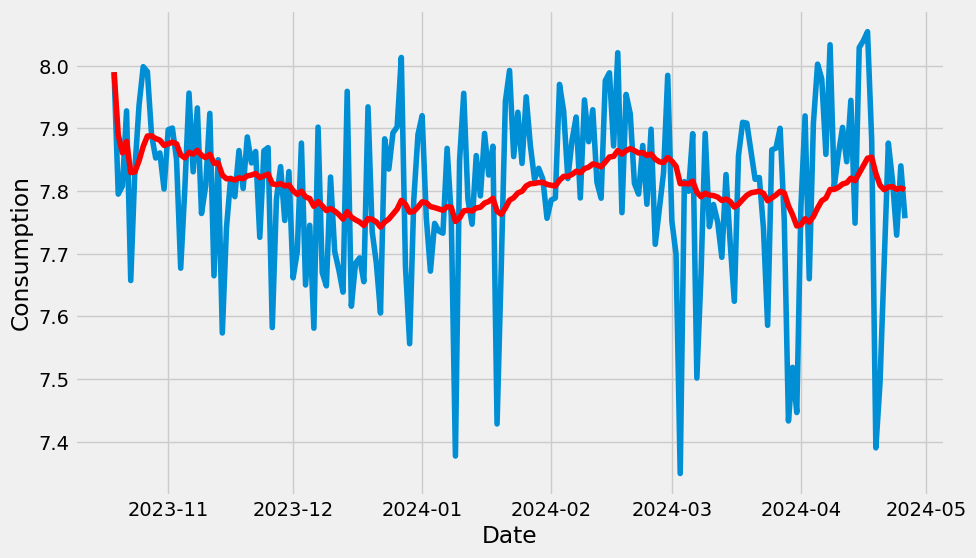

In [ ]:
plt.plot(df_log)
plt.plot(weighted_average, color='red')
plt.xlabel("Date")
plt.ylabel("Consumption")
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
#plt.legend()
plt.show(block =False)

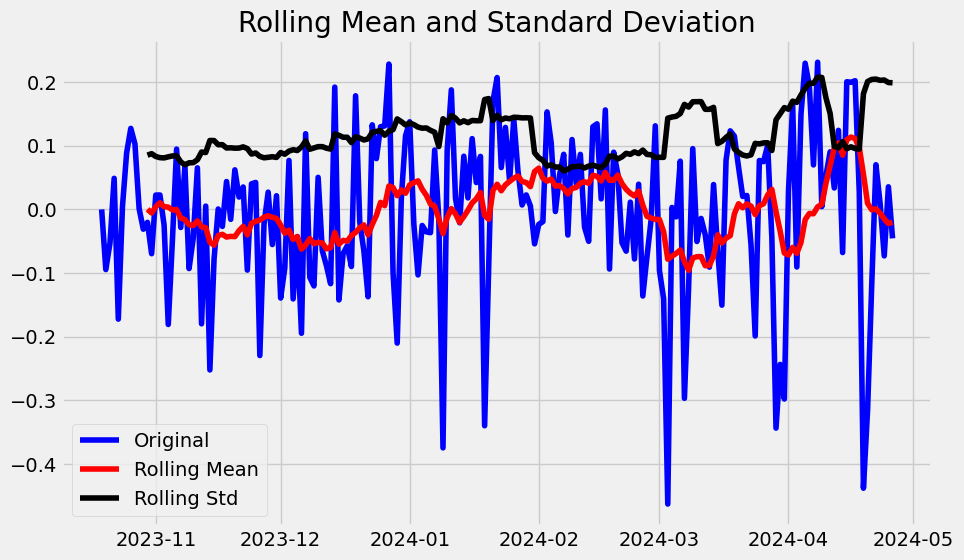

Results of dickey fuller test
Test Statistics               -1.089385e+01
p-value                        1.206112e-19
No. of lags used               0.000000e+00
Number of observations used    1.900000e+02
critical value (1%)           -3.465244e+00
critical value (5%)           -2.876875e+00
critical value (10%)          -2.574945e+00
dtype: float64


In [ ]:
logScale_weightedMean = df_log-weighted_average
# use the same function defined above and pass the object into it.
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
test_stationarity(logScale_weightedMean)

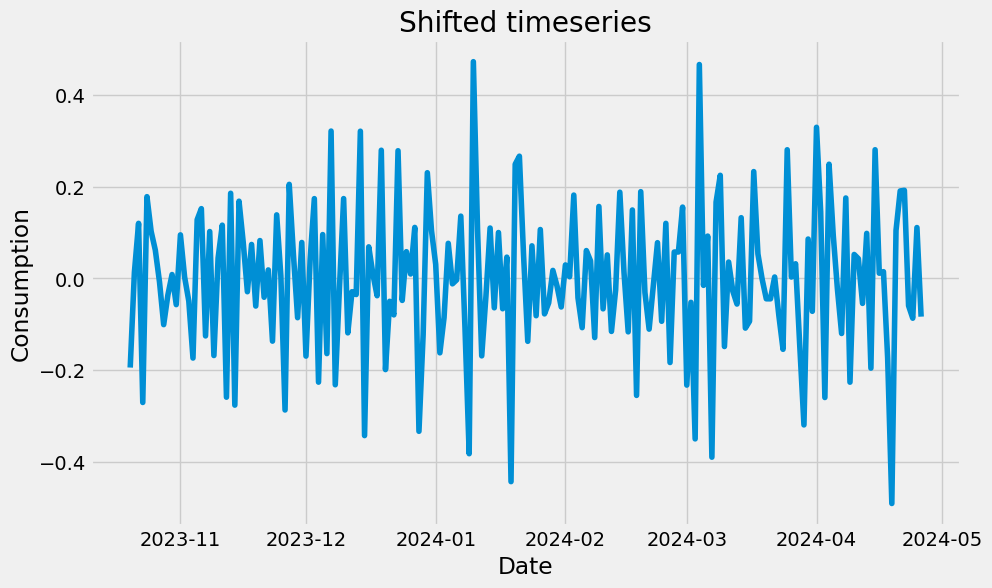

In [ ]:
df_log_diff = df_log - df_log.shift()
plt.title("Shifted timeseries")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.plot(df_log_diff)


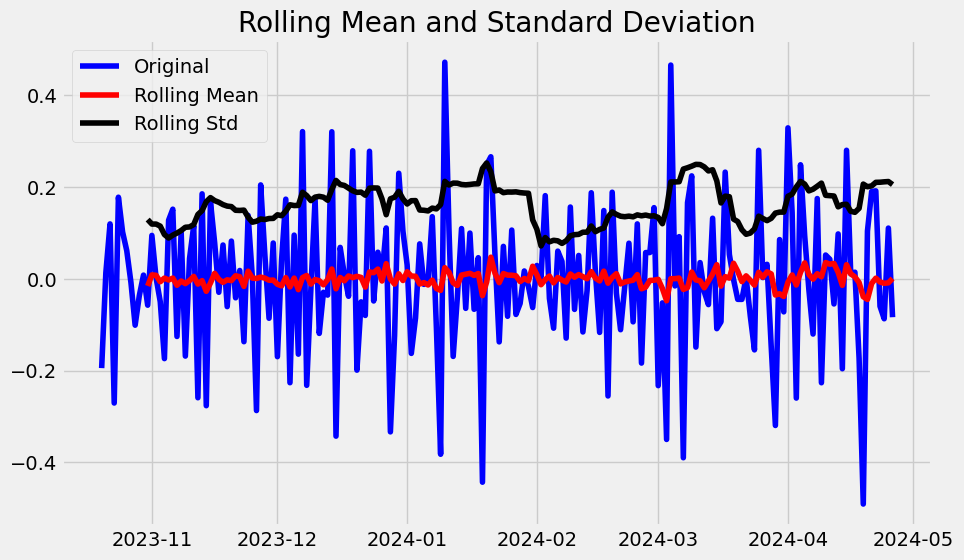

Results of dickey fuller test
Test Statistics               -7.529644e+00
p-value                        3.606948e-11
No. of lags used               8.000000e+00
Number of observations used    1.810000e+02
critical value (1%)           -3.467005e+00
critical value (5%)           -2.877644e+00
critical value (10%)          -2.575355e+00
dtype: float64


In [ ]:
df_log_diff.dropna(inplace=True)

test_stationarity(df_log_diff)

In [ ]:
!pip install chart-studio

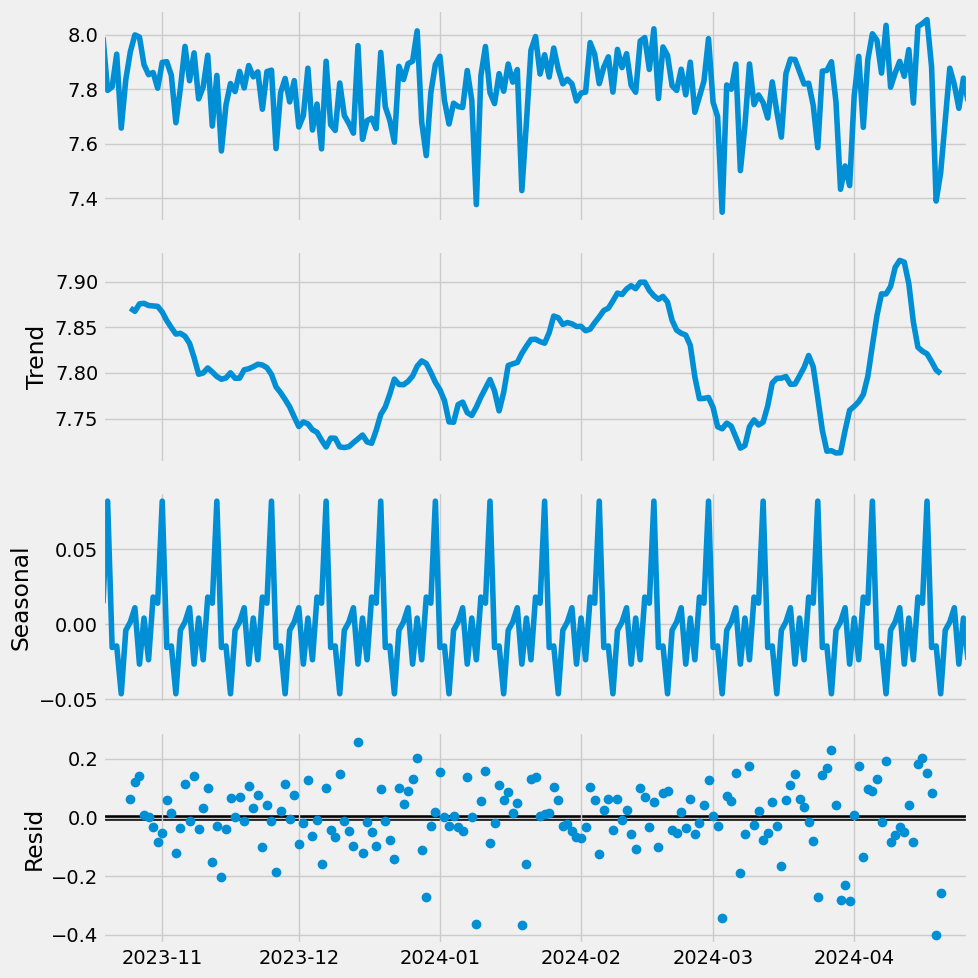

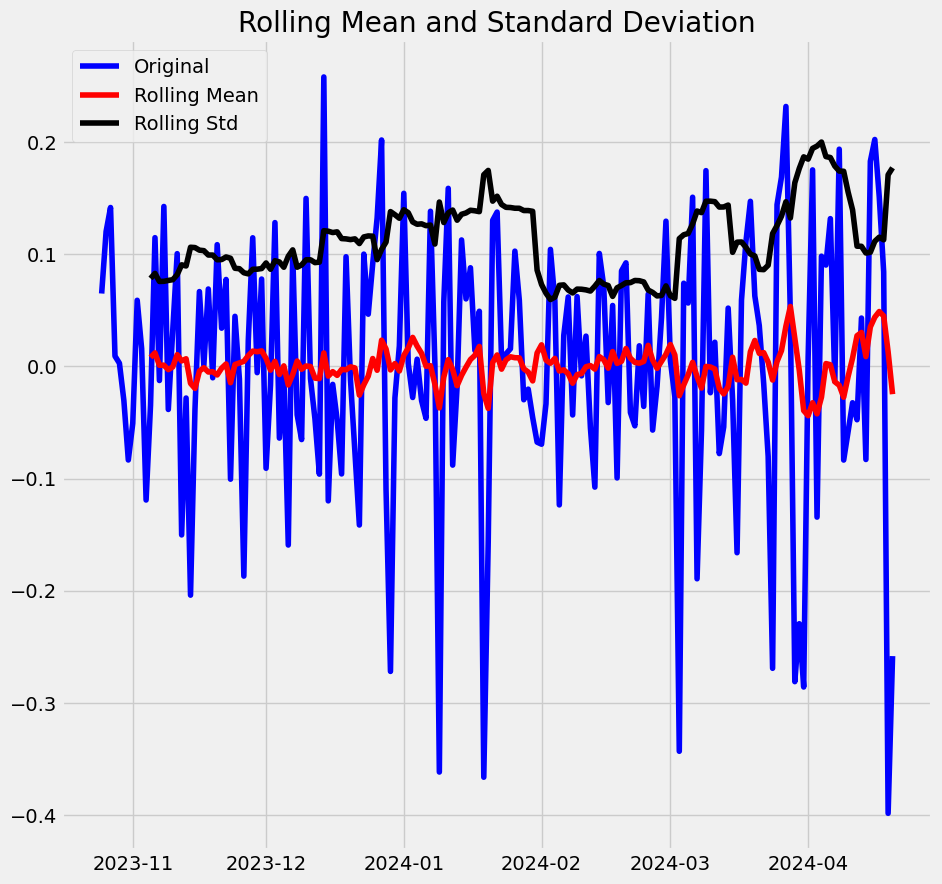

Results of dickey fuller test


KeyError: 'Consumption'

In [ ]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_log, model='additive', period= 12)
result.plot()
plt.show()

trend = result.trend
trend.dropna(inplace=True)

seasonality = result.seasonal
seasonality.dropna(inplace=True)

residual = result.resid
residual.dropna(inplace=True)

test_stationarity(residual)


In [ ]:
from statsmodels.tsa.stattools import acf,pacf
# we use d value here(data_log_shift)
acf = acf(df_log_diff, nlags=15)
pacf= pacf(df_log_diff, nlags=15,method='ols')

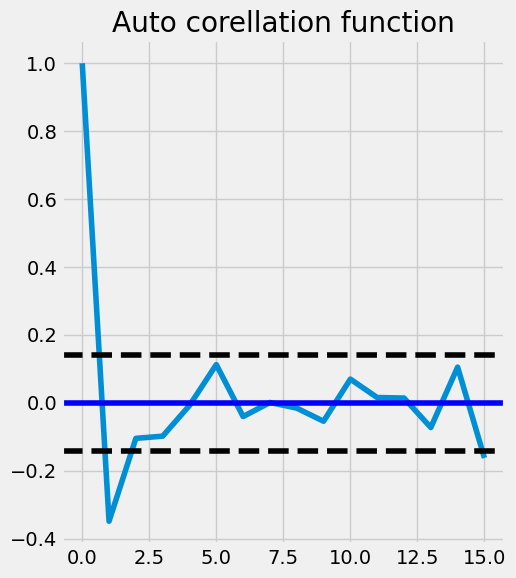

In [ ]:
plt.subplot(121)
plt.plot(acf)
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()

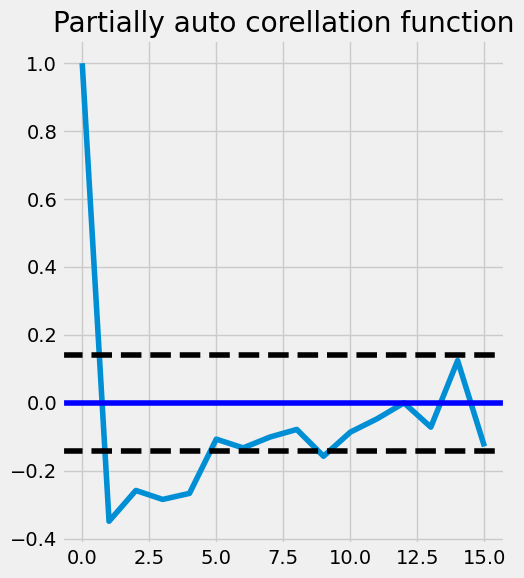

In [ ]:
plt.subplot(122)
plt.plot(pacf)
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()

RSS : nan


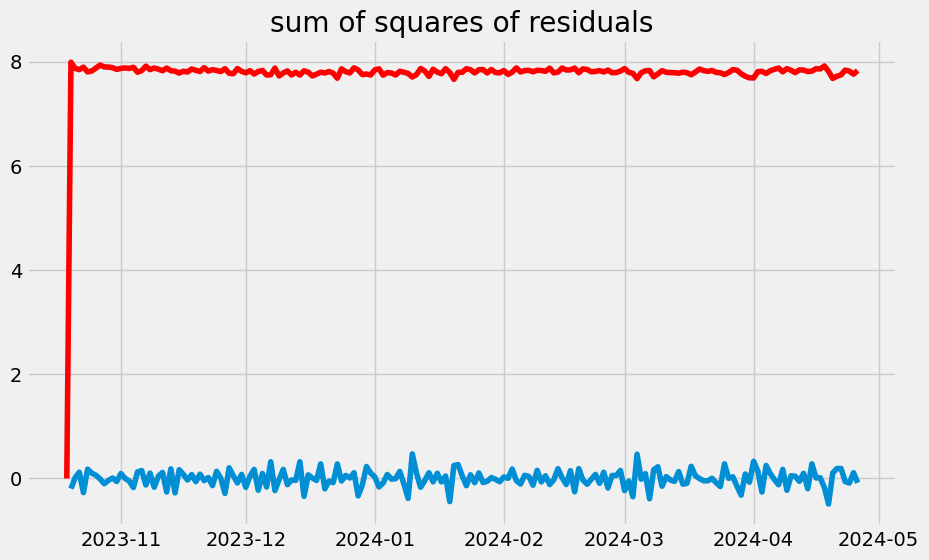

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_log, order=(3,1,3))
result_AR = model.fit()
plt.plot(df_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_AR.fittedvalues-df_log_diff["Consumption"])**2))

Date
2023-10-19     0.000000
2023-10-20     7.989899
2023-10-21    15.862642
2023-10-22    23.710534
2023-10-23    31.605106
dtype: float64
Date
2023-10-19     7.989899
2023-10-20    15.785134
2023-10-21    23.670965
2023-10-22    31.638579
2023-10-23    39.262389
dtype: float64


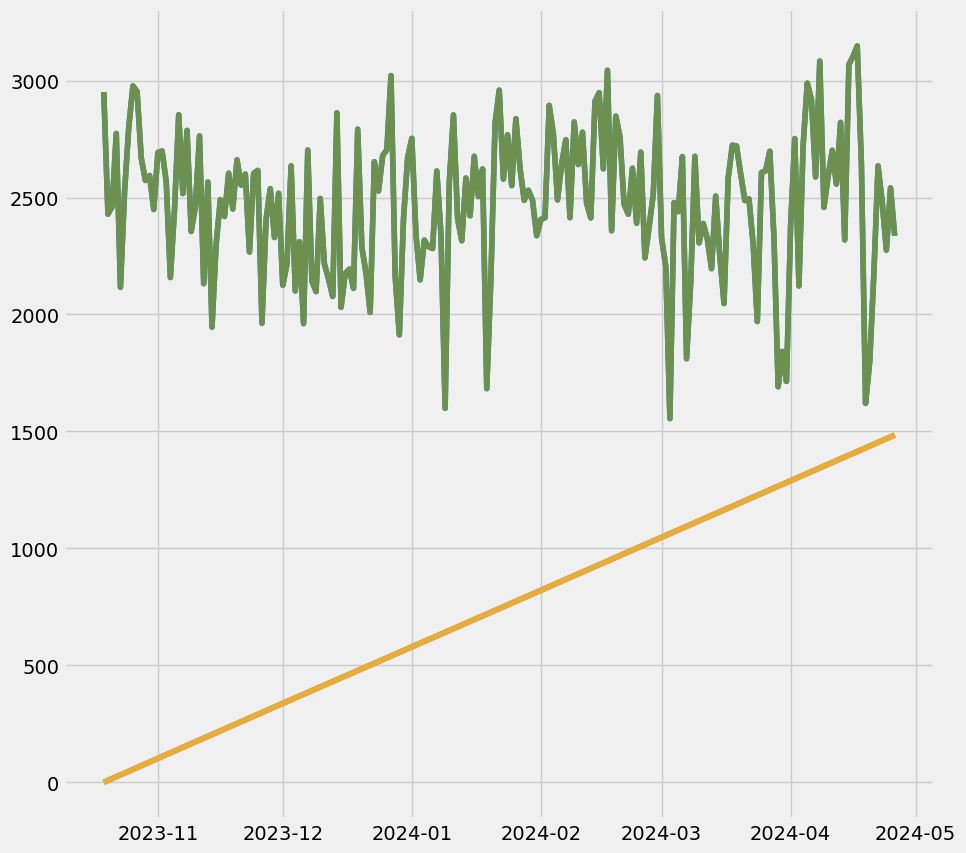

In [ ]:

ARIMA_predicts = pd.Series(result_AR.fittedvalues,copy=True)
ARIMA_predicts.head()

# finding the cummulative sum
ARIMA_predicts_cumsum = ARIMA_predicts.cumsum()
print(ARIMA_predicts_cumsum.head())


ARIMA_predicts_log = pd.Series(df_log['Consumption'],index = df_log.index)
ARIMA_predicts_log = ARIMA_predicts_log.add(ARIMA_predicts_cumsum,fill_value=0)
print(ARIMA_predicts_log.head())

# converting back to the exponential form results in getting back to the original data.
ARIMA_final_preditcs = np.exp(ARIMA_predicts_log)
rcParams['figure.figsize']=10,10
plt.plot(df)
plt.plot(ARIMA_predicts_cumsum)

plt.plot(ARIMA_predicts_cumsum)
plt.plot(df)


Forecasted energy consumption for the next 10 days:
2024-04-27    7.795920
2024-04-28    7.780599
2024-04-29    7.818632
2024-04-30    7.802449
2024-05-01    7.791670
2024-05-02    7.822957
2024-05-03    7.793879
2024-05-04    7.800862
2024-05-05    7.820270
2024-05-06    7.788610
Freq: D, Name: predicted_mean, dtype: float64


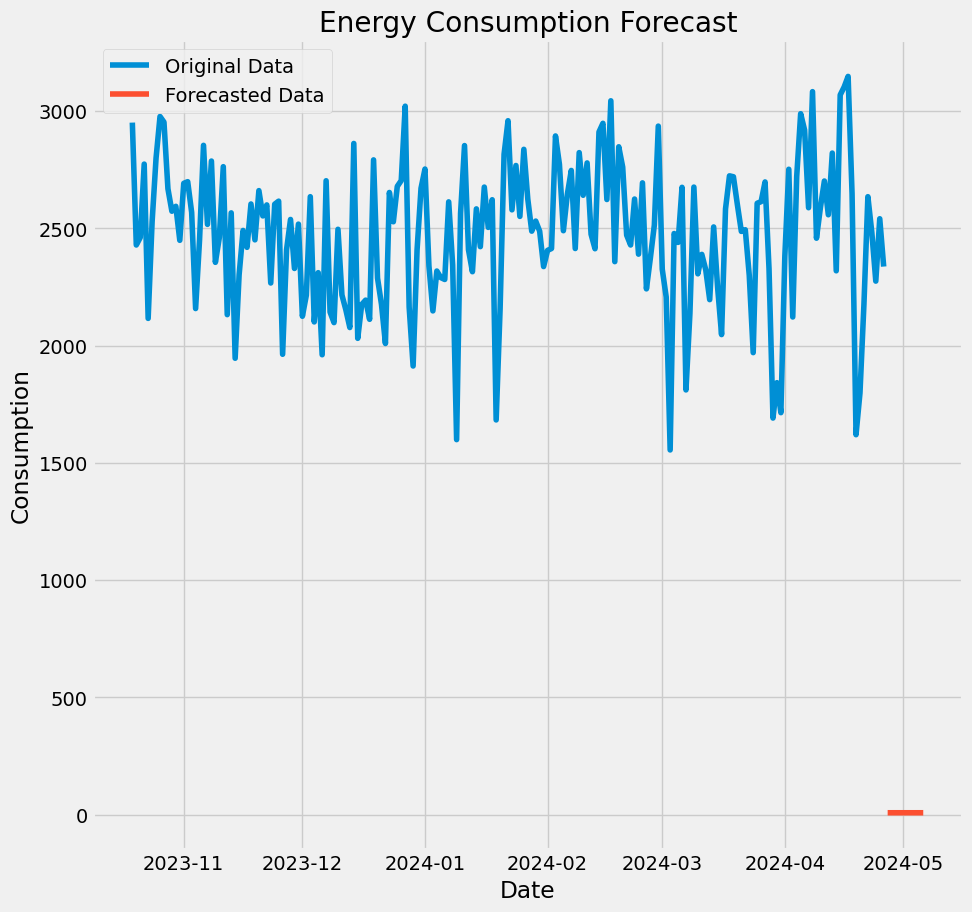

In [ ]:
# Forecasting the next 10 days
forecast_steps = 10
forecast = result_AR.forecast(steps=forecast_steps)

# Display the forecasted values
print("Forecasted energy consumption for the next 10 days:")
print(forecast)

# Plot the original data and the forecasted values
plt.plot(df.index, df['Consumption'], label='Original Data')
plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, label='Forecasted Data')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Energy Consumption Forecast')
plt.legend()
plt.show()


In [ ]:
# Fit ARIMA model to the original data
model = ARIMA(df, order=(3, 1, 3))
result_AR = model.fit()

# Forecast the next 10 days
forecast_steps = 30
forecast = result_AR.forecast(steps=forecast_steps)
forecast_rounded = forecast.round()
# Display the forecasted values
print("Forecasted energy consumption for the next 10 days:")
print(forecast_rounded)

# Plot the original data and the forecasted values



Forecasted energy consumption for the next 10 days:
2024-04-27    2504.0
2024-04-28    2424.0
2024-04-29    2468.0
2024-04-30    2522.0
2024-05-01    2425.0
2024-05-02    2493.0
2024-05-03    2504.0
2024-05-04    2427.0
2024-05-05    2510.0
2024-05-06    2483.0
2024-05-07    2436.0
2024-05-08    2517.0
2024-05-09    2464.0
2024-05-10    2451.0
2024-05-11    2517.0
2024-05-12    2450.0
2024-05-13    2468.0
2024-05-14    2510.0
2024-05-15    2443.0
2024-05-16    2484.0
2024-05-17    2498.0
2024-05-18    2442.0
2024-05-19    2496.0
2024-05-20    2484.0
2024-05-21    2448.0
2024-05-22    2503.0
2024-05-23    2471.0
2024-05-24    2457.0
2024-05-25    2504.0
2024-05-26    2461.0
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Forecast the energy consumption using the trained ARIMA model
forecast = result_AR.forecast(steps=len(df))  # Forecast for the entire dataset

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(df['Consumption'], forecast)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(df['Consumption'], forecast)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Display the accuracy metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 241.37778748036777
Mean Squared Error (MSE): 96057.50435652763
Root Mean Squared Error (RMSE): 309.9314510605976


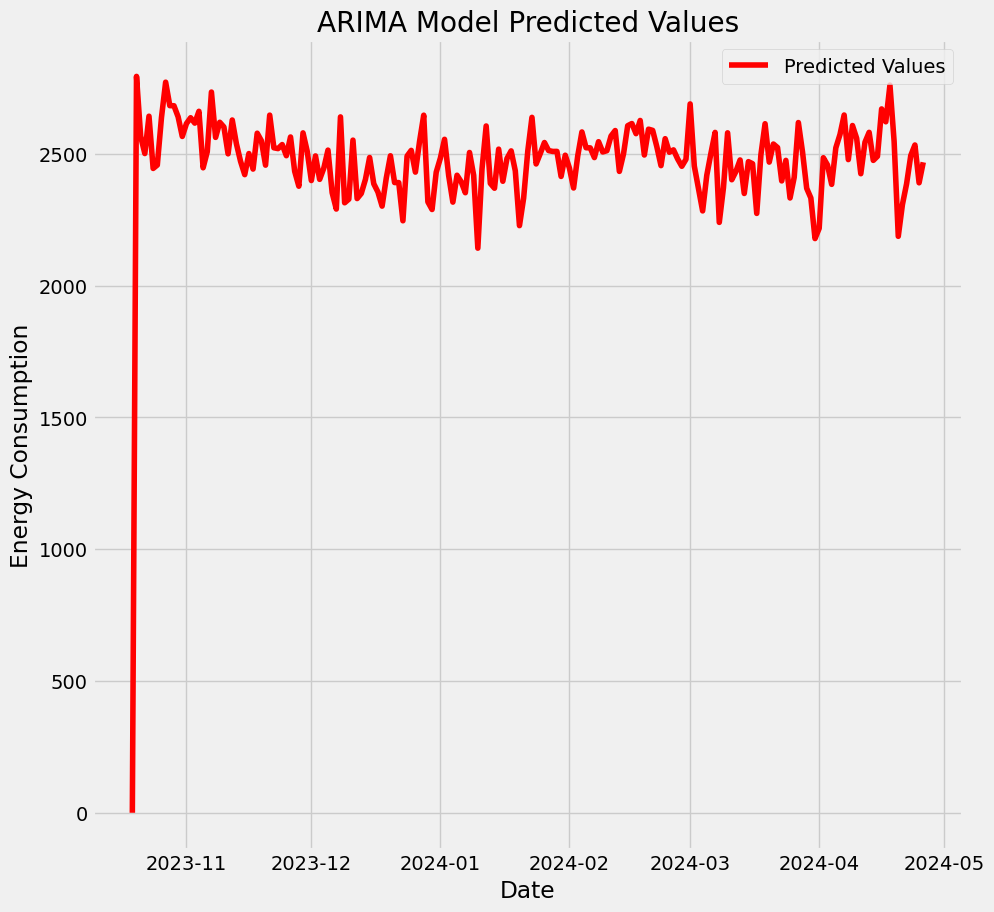

In [ ]:
import matplotlib.pyplot as plt

# Plot the predicted values
plt.plot(df.index, result_AR.fittedvalues, label='Predicted Values', color='red')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('ARIMA Model Predicted Values')

# Add legend
plt.legend()

# Show plot
plt.show()
